In [1]:
#Objective

# Predict the customers who can opt for new Wellness Tourism Package?!
# Consider the customers data available for prediction

In [2]:
#Importing packages
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [3]:
#Working Directory
os.getcwd()

'C:\\Users\\a978793\\Desktop\\MLTask'

In [4]:
#Loading dataset
travel_package_df = pd.read_excel('Tourism.xlsx',sheet_name='Tourism')

In [5]:
travel_package_df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisited',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [6]:
#Data Sanity Checks

In [7]:
travel_package_df.head(3)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0


In [8]:
travel_package_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

In [9]:
# Data is not of sparse in nature, In few columns data is missing which can be treating using imputation techniques

In [10]:
#Exploratory Data Analysis
#----------------------------
# 1. Univariate, Bi-variate Analysis
# 2. Visualizations to identify the patterns
# 3. Characteristics of the customers of each package opted for
# 4. Meaningful observations on the relationship between variables

In [11]:
#Customer Details
['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
   'Occupation', 'Gender', 'NumberOfPersonVisited',
   'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport',
   'OwnCar', 'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome']

['CustomerID',
 'ProdTaken',
 'Age',
 'TypeofContact',
 'CityTier',
 'Occupation',
 'Gender',
 'NumberOfPersonVisited',
 'PreferredPropertyStar',
 'MaritalStatus',
 'NumberOfTrips',
 'Passport',
 'OwnCar',
 'NumberOfChildrenVisited',
 'Designation',
 'MonthlyIncome']

In [12]:
#Customer Interaction Data
['PitchSatisfactionScore', 'ProductPitched', 'NumberOfFollowups', 'DurationOfPitch']

['PitchSatisfactionScore',
 'ProductPitched',
 'NumberOfFollowups',
 'DurationOfPitch']

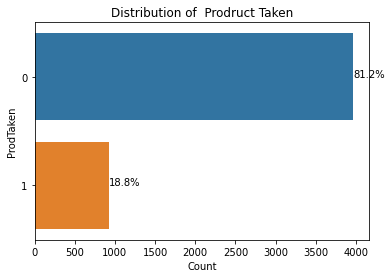

In [13]:
ax = sns.countplot(y="ProdTaken", data=travel_package_df)
plt.title('Distribution of  Prodruct Taken')
plt.xlabel('Count')

total = len(travel_package_df['ProdTaken'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [14]:
# 18.8 % of the records have positive response to the target variable called ProdTaken,
# Which means that there are lot of customers (81%) who did not opted for any travel package in the available data.

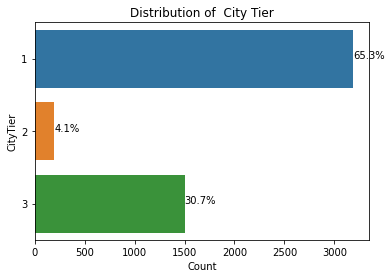

In [15]:
ax = sns.countplot(y="CityTier", data=travel_package_df)
plt.title('Distribution of  City Tier')
plt.xlabel('Count')

total = len(travel_package_df['CityTier'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [16]:
# 65% of the customers are from Tier-1 cities and 30% of the customers from Tier 3 cities.

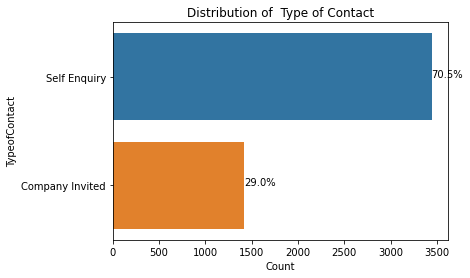

In [17]:
ax = sns.countplot(y="TypeofContact", data=travel_package_df)
plt.title('Distribution of  Type of Contact')
plt.xlabel('Count')

total = len(travel_package_df['TypeofContact'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [18]:
# 70% of the customers have reached company through self enquiry
# where as only 29% of the customers have come due to company advertisements or compains.

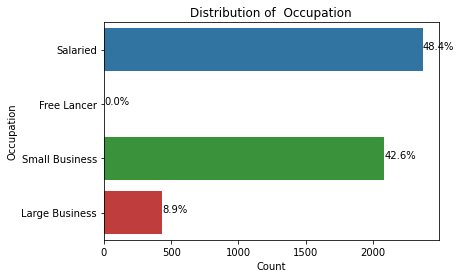

In [19]:
ax = sns.countplot(y="Occupation", data=travel_package_df)
plt.title('Distribution of  Occupation')
plt.xlabel('Count')

total = len(travel_package_df['Occupation'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [20]:
# Close to half of the customers are salaried, and rest of the half are running small to large businesses

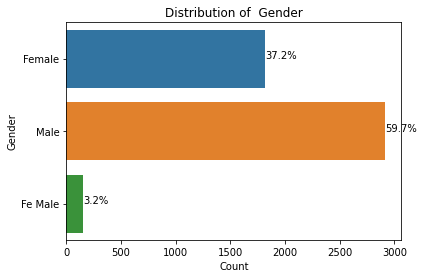

In [21]:
ax = sns.countplot(y="Gender", data=travel_package_df)
plt.title('Distribution of  Gender')
plt.xlabel('Count')

total = len(travel_package_df['Gender'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [22]:
# 60% of the customers are Male and rest of the 40% are female of which 3.2% records there is data inconsistency.

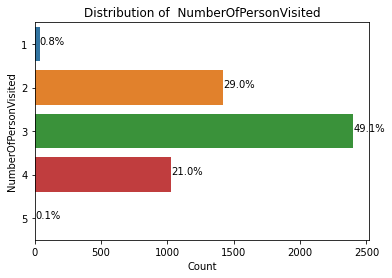

In [23]:
ax = sns.countplot(y="NumberOfPersonVisited", data=travel_package_df)
plt.title('Distribution of  NumberOfPersonVisited')
plt.xlabel('Count')

total = len(travel_package_df['NumberOfPersonVisited'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [24]:
# Most of the times 3 to 2 persons visited and only 21% of the times 4 persons visited.

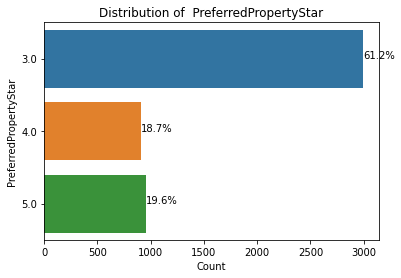

In [25]:
ax = sns.countplot(y="PreferredPropertyStar", data=travel_package_df)
plt.title('Distribution of  PreferredPropertyStar')
plt.xlabel('Count')

total = len(travel_package_df['PreferredPropertyStar'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [26]:
# Customers are selecting only the hotels which are rated above 3 stars. 

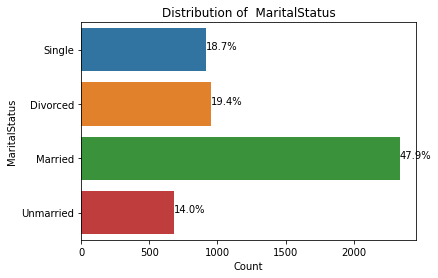

In [27]:
ax = sns.countplot(y="MaritalStatus", data=travel_package_df)
plt.title('Distribution of  MaritalStatus')
plt.xlabel('Count')

total = len(travel_package_df['MaritalStatus'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [28]:
# 48% of the customers are married, 38% of the customers are Divorced/Single and only 14% of the customers are Unmarried.

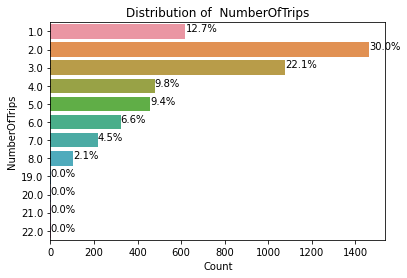

In [29]:
ax = sns.countplot(y="NumberOfTrips", data=travel_package_df)
plt.title('Distribution of  NumberOfTrips')
plt.xlabel('Count')

total = len(travel_package_df['NumberOfTrips'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [30]:
# 52% of the customers have made 2 to 3 trips and there are 6% of the customers who made 7 to 8 trips.

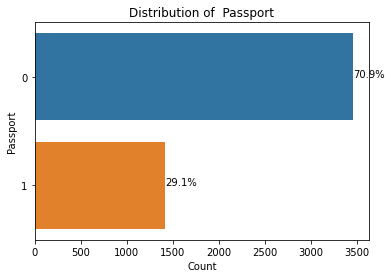

In [31]:
ax = sns.countplot(y="Passport", data=travel_package_df)
plt.title('Distribution of  Passport')
plt.xlabel('Count')

total = len(travel_package_df['Passport'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [32]:
# Majority of the customers (71%) have Passport

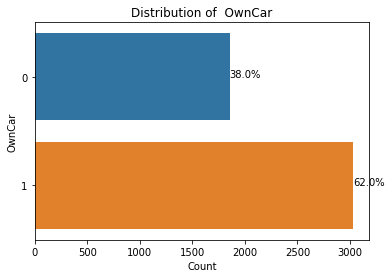

In [33]:
ax = sns.countplot(y="OwnCar", data=travel_package_df)
plt.title('Distribution of  OwnCar')
plt.xlabel('Count')

total = len(travel_package_df['OwnCar'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [34]:
# 62% of the customers own a car

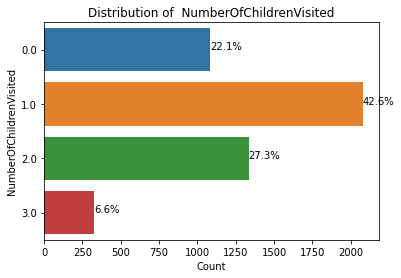

In [35]:
ax = sns.countplot(y="NumberOfChildrenVisited", data=travel_package_df)
plt.title('Distribution of  NumberOfChildrenVisited')
plt.xlabel('Count')

total = len(travel_package_df['NumberOfChildrenVisited'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [36]:
# 70% of the customers have visited along with 1/2 children

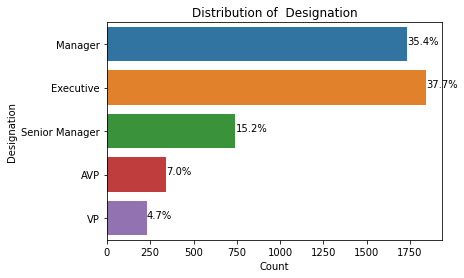

In [37]:
ax = sns.countplot(y="Designation", data=travel_package_df)
plt.title('Distribution of  Designation')
plt.xlabel('Count')

total = len(travel_package_df['Designation'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [38]:
# 73% of the customers at Manager/Executive level in their occupation and rest of the customers at higher positions

<AxesSubplot:ylabel='Frequency'>

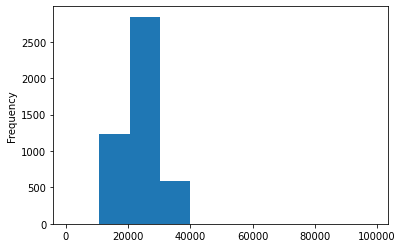

In [39]:
travel_package_df['MonthlyIncome'].sort_index().plot.hist()

In [40]:
# Most of the customers are earning 20k to 30k, where as 10% of the customers are earning around 40k per month

<AxesSubplot:ylabel='Frequency'>

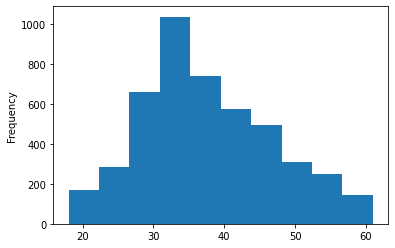

In [41]:
travel_package_df['Age'].sort_index().plot.hist()

In [42]:
# Most of the customers age is greater than 30

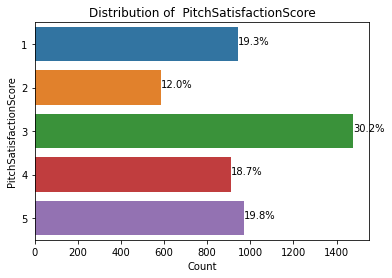

In [43]:
ax = sns.countplot(y="PitchSatisfactionScore", data=travel_package_df)
plt.title('Distribution of  PitchSatisfactionScore')
plt.xlabel('Count')

total = len(travel_package_df['PitchSatisfactionScore'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [44]:
# 38% of the times we have good pitch satisfaction score, 
# 30% of the times moderate pitch satisfaction score and 
# 31% of the times bad pitch satisfaction score

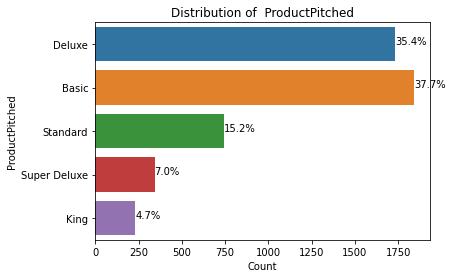

In [45]:
ax = sns.countplot(y="ProductPitched", data=travel_package_df)
plt.title('Distribution of  ProductPitched')
plt.xlabel('Count')

total = len(travel_package_df['ProductPitched'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [46]:
# Basic and Deluxe products were pitched most of the times

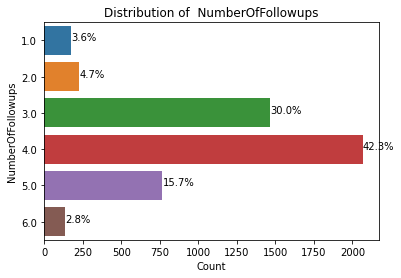

In [47]:
ax = sns.countplot(y="NumberOfFollowups", data=travel_package_df)
plt.title('Distribution of  NumberOfFollowups')
plt.xlabel('Count')

total = len(travel_package_df['NumberOfFollowups'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [48]:
# Most of the times we did 3 to 4 follow ups and 18% of the times we did 5 to 6 follow ups

<AxesSubplot:ylabel='Frequency'>

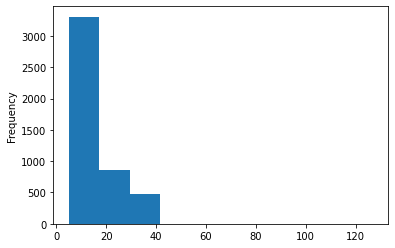

In [49]:
travel_package_df['DurationOfPitch'].sort_index().plot.hist()

In [50]:
# Most of the times Duration of the pitch is about 10 mins

In [51]:
travel_package_df.groupby(['ProdTaken']).agg({'CustomerID':'size', 'NumberOfFollowups':['max','mean','min'], 'DurationOfPitch':['mean', 'std'], 'PitchSatisfactionScore':['mean', 'std']})

CustomerID NumberOfFollowups                DurationOfPitch  \
                size               max      mean  min            mean   
ProdTaken                                                               
0               3968               6.0  3.654286  1.0       15.169325   
1                920               6.0  3.941886  1.0       16.873143   

                    PitchSatisfactionScore            
                std                   mean       std  
ProdTaken                                             
0          8.499420               3.044355  1.372439  
1          8.472929               3.223913  1.327648

In [52]:
travel_package_df.groupby(['ProductPitched','ProdTaken']).agg({'CustomerID':'size', 'NumberOfFollowups':['max','mean','min'], 'DurationOfPitch':['mean', 'std'], 'PitchSatisfactionScore':['mean', 'std']})

CustomerID NumberOfFollowups                 \
                               size               max      mean  min   
ProductPitched ProdTaken                                               
Basic          0               1290               6.0  3.583919  1.0   
               1                552               6.0  3.950730  1.0   
Deluxe         0               1528               6.0  3.666000  1.0   
               1                204               6.0  3.970000  1.0   
King           0                210               6.0  3.757143  1.0   
               1                 20               6.0  4.300000  3.0   
Standard       0                618               6.0  3.762136  1.0   
               1                124               6.0  3.935484  1.0   
Super Deluxe   0                322               6.0  3.605590  1.0   
               1                 20               6.0  3.100000  1.0   

                         DurationOfPitch           PitchSatisfactionScore  \
                                    mean       std                   mean   
ProductPitched ProdTaken                                                    
Basic          0               14.940753  8.931883               3.024806   
               1               15.791353  7.906926               3.213768   
Deluxe         0               15.517975  8.284156               3.002618   
               1               19.100000  9.227176               3.039216   
King           0               12.252381  5.880640               3.219048   
               1               10.500000  4.135851               3.300000   
Standard       0               15.373786  8.008773               2.980583   
               1               19.065041  9.048811               3.467742   
Super Deluxe   0               16.090062  9.593350               3.329193   
               1               18.500000  7.330542               3.800000   

                                    
                               std  
ProductPitched ProdTaken            
Basic          0          1.350576  
               1          1.353074  
Deluxe         0          1.375239  
               1          1.278250  
King           0          1.444216  
               1          1.218282  
Standard       0          1.385130  
               1          1.309350  
Super Deluxe   0          1.338509  
               1          1.005249

In [53]:
# Multi Variate Analysis

In [54]:
travel_package_df[['PitchSatisfactionScore', 'ProductPitched','NumberOfFollowups', 'DurationOfPitch']].head(5)

,PitchSatisfactionScore,ProductPitched,NumberOfFollowups,DurationOfPitch
0,2,Deluxe,3.0,6.0
1,3,Deluxe,4.0,14.0
2,3,Basic,4.0,8.0
3,5,Basic,3.0,9.0
4,5,Basic,3.0,8.0


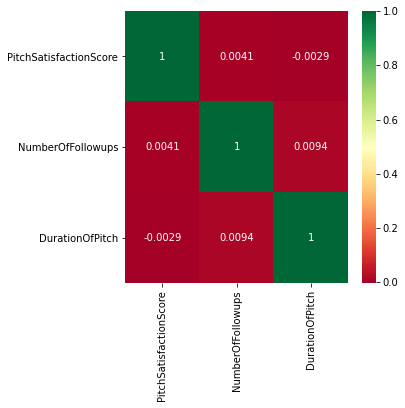

In [55]:
corrmat = travel_package_df[['PitchSatisfactionScore', 'NumberOfFollowups', 'DurationOfPitch']].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
#plot heat map
g=sns.heatmap(travel_package_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [56]:
# There is no much interaction between 'PitchSatisfactionScore', 'NumberOfFollowups' and 'DurationOfPitch' variables.

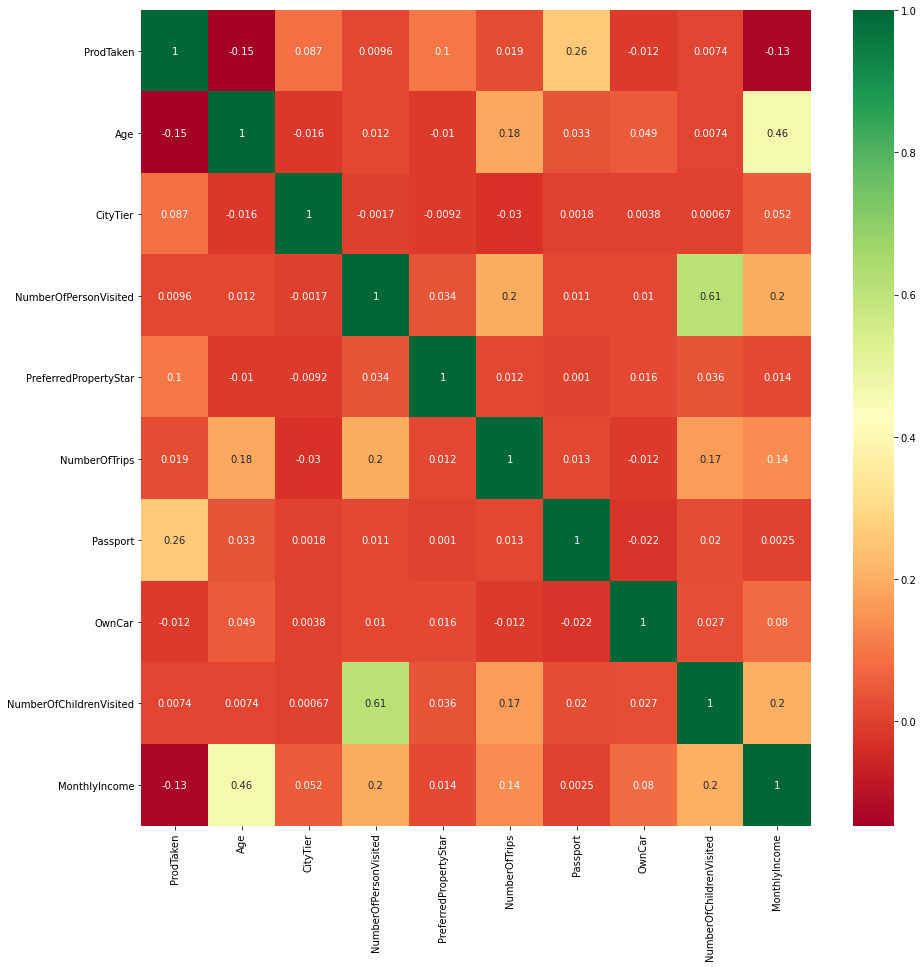

In [57]:
corrmat = travel_package_df[['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'Occupation', 'Gender', 'NumberOfPersonVisited', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport',
   'OwnCar', 'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome']].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(travel_package_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [58]:
# Passport has very strong correlation, City Tier has weak strong positive correlation towards product taken

# Age and Monthly income, No.of Persons visited & No.of Children visited have very strong positive correlations

# No.of Persons visited and Monthly income, No.of Trips and Monthly Income, 
# Owning a car and Monthly Income have +ve correlations

# But the Product Taken and Monthly Income have -ve Correlation, 
# this could be due to the skewness in the the data as the lables are not in balance

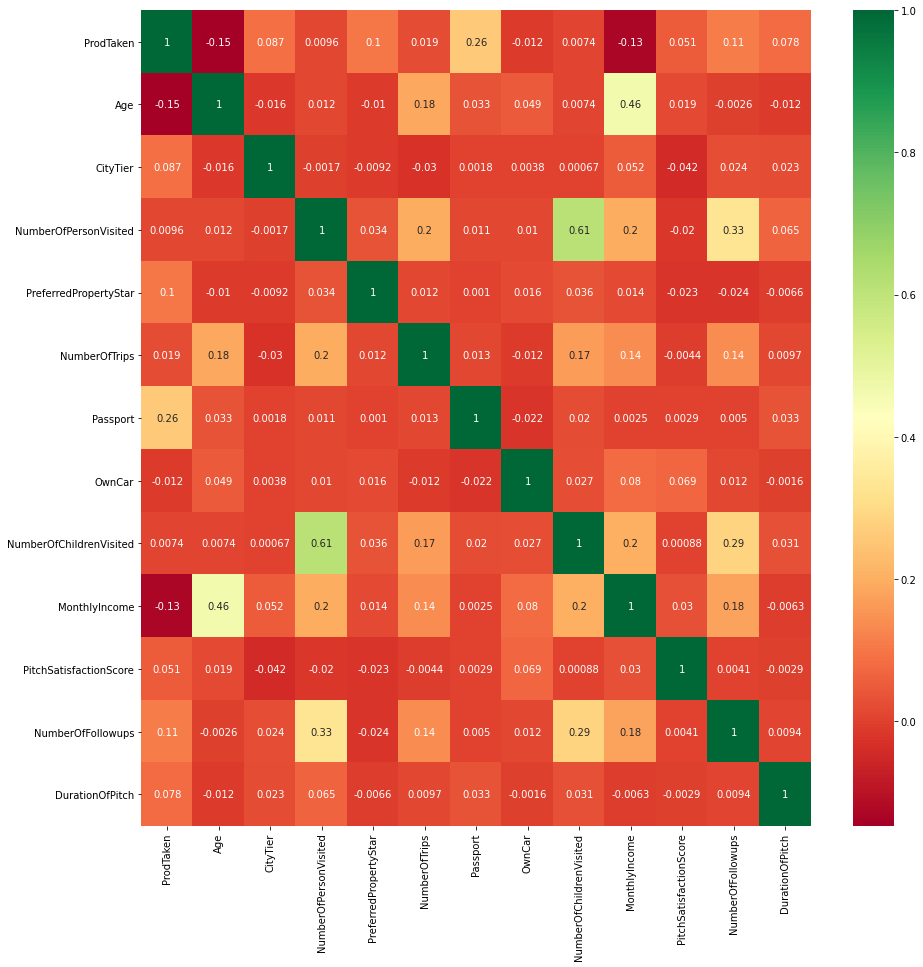

In [59]:
corrmat2 = travel_package_df[['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'Occupation', 'Gender', 'NumberOfPersonVisited', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport',
   'OwnCar', 'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome', 'PitchSatisfactionScore', 'NumberOfFollowups', 'DurationOfPitch']].corr()
top_corr_features2 = corrmat2.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(travel_package_df[top_corr_features2].corr(),annot=True,cmap="RdYlGn")

In [60]:
# More the no.of persons for a trip, More no.of follow ups were needed 
# Owning a car is negatively correlated to the No.of Trips

In [61]:
# Data Pre-Processing
#---------------------
# 1. Missing value treatment
# 2. Outlier Detection
# 3. Feature Engineering

In [62]:
# Null Values or Incorrect Imputation
travel_package_df.isnull().sum()

CustomerID                   0
ProdTaken                    0
Age                        226
TypeofContact               25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

In [63]:
#The data in Age, DurationOfPitch, MonthlyIncome columns is relatively missing in more number of records

In [64]:
# General criteria for Imputation
#---------------------------------
# DurationOfPitch, MontlyIncome can be imputed with Mean as these are Continuous variables

# TypeofContact, No.of FollowUps, PreferredPropertyStar, No.of Trips can be imputed 
# with Mode value as these are Categorical variables

# No.of Children Visited can be imputed using the marital status & Mode value
# Age can be imputed with Median
# Correct the data of Gender column where 'Fe Male' need to be replaced with 'Female', found it from EDA analysis

In [65]:
Age_median = travel_package_df['Age'].median()
DurationOfPitch_median = travel_package_df['DurationOfPitch'].median()
MonthlyIncome_median = travel_package_df['MonthlyIncome'].median()

TypeOfContact_mode = travel_package_df['TypeofContact'].mode()
NumberOfFollowUps_mode = travel_package_df['NumberOfFollowups'].mode()
PreferredPropertyStar_mode = travel_package_df['PreferredPropertyStar'].mode()
NumberOfTrips_mode = travel_package_df['NumberOfTrips'].mode()

In [66]:
(Age_median, DurationOfPitch_median, MonthlyIncome_median)

(36.0, 13.0, 22347.0)

In [67]:
(TypeOfContact_mode, NumberOfFollowUps_mode, PreferredPropertyStar_mode, NumberOfTrips_mode)

(0    Self Enquiry
 dtype: object, 0    4.0
 dtype: float64, 0    3.0
 dtype: float64, 0    2.0
 dtype: float64)

In [68]:
# Based on the general criteria for imputations, we got the following values respetively
# Age -> 36.0
# DurationOfPitch -> 13.0 
# MontylyIncome -> 22347.0
# TypeOfContact -> Self Enquiry
# NumberOfFollowUps -> 4.0
# PreferredPropertyStar -> 3.0
# NumberOfTrips -> 2.0

In [69]:
travel_package_df.groupby('MaritalStatus').agg({'NumberOfChildrenVisited':['min','max','median']})

NumberOfChildrenVisited            
                                  min  max median
MaritalStatus                                    
Divorced                          0.0  3.0    1.0
Married                           0.0  3.0    1.0
Single                            0.0  3.0    1.0
Unmarried                         0.0  3.0    1.0

In [70]:
# NumberOfChildren -> 1.0

In [71]:
# Outlier detection for the following columns
# DurationOfPitch
# MonthlyIncome
# NumberOfFollowUps
# NumberOfTrips

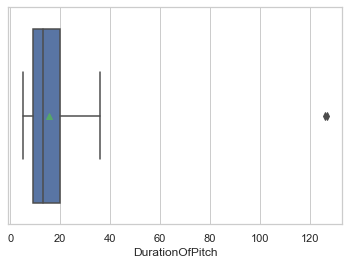

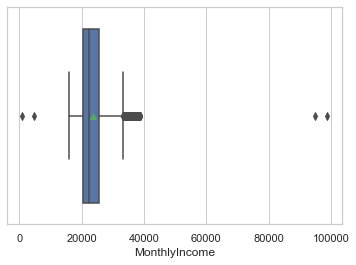

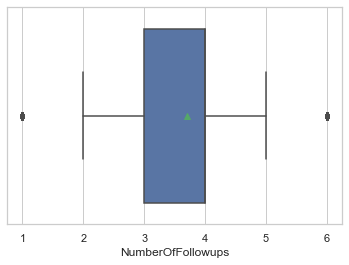

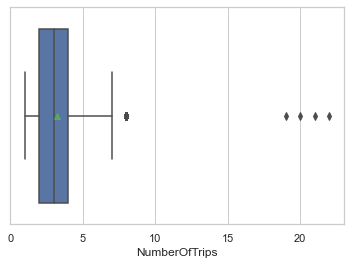

In [72]:
listt=['DurationOfPitch','MonthlyIncome','NumberOfFollowups', 'NumberOfTrips']
for i in listt:
    data = travel_package_df[i]
    sns.set_theme(style="whitegrid")
    box_plot = sns.boxplot(x=data, showmeans=True)
    plt.show()

In [73]:
# By looking at the boxplot of Monthly income, we noticed that the upper threshold of the column is 35000 
# and lower thershold of the column must be 18000
len(travel_package_df[travel_package_df['MonthlyIncome'] > 35000].index)

208

In [74]:
len(travel_package_df[travel_package_df['MonthlyIncome'] < 18000].index)

668

In [75]:
len(travel_package_df[travel_package_df['NumberOfFollowups'] > 5].index)

136

In [76]:
len(travel_package_df[travel_package_df['NumberOfFollowups'] < 2].index)

176

In [77]:
len(travel_package_df[travel_package_df['NumberOfTrips'] > 10].index)

4

In [78]:
# From the plots above

# DurationOfPitch : Two outliers exists with values above 120 mins, 
#    Acceptable range of values is upto 36 mins, so these values can be capped at 36 mins

# MonthlyIncome : 668(~14%) customers salary is way above than the rest of the customers
#    So these 668 custmers can be treated separetly. And 4% of the customers are at lower side with < 18000 monthly salary

# NumberOfFollowUps : Acceptable range of values is 2 to 5, We have few outliers on the lower & upper side of the plot
#    As the total range of values for this column is less, we are keeping them as they are.

# NumberOfTrips : The acceptable range of values is less than 8 from the plot;
#    But we have 4 extreme outliers with values around 20, these can be capped at 8

In [79]:
# Data Pre-processing based on the analysis done on Missing Values and Outliers Treatment

# 1. Missing Values Treatment
# Age -> 36.0
travel_package_df['Age'] = travel_package_df['Age'].fillna(36.0)
# DurationOfPitch -> 13.0 
travel_package_df['DurationOfPitch'] = travel_package_df['DurationOfPitch'].fillna(13.0)
# MontylyIncome -> 22347.0
travel_package_df['MonthlyIncome'] = travel_package_df['MonthlyIncome'].fillna(22347.0)
# TypeOfContact -> Self Enquiry
travel_package_df['TypeofContact'] = travel_package_df['TypeofContact'].fillna('Self Enquiry')
# NumberOfFollowUps -> 4.0
travel_package_df['NumberOfFollowups'] = travel_package_df['NumberOfFollowups'].fillna(4.0)
# PreferredPropertyStar -> 3.0
travel_package_df['PreferredPropertyStar'] = travel_package_df['PreferredPropertyStar'].fillna(3.0)
# NumberOfTrips -> 2.0
travel_package_df['NumberOfTrips'] = travel_package_df['NumberOfTrips'].fillna(2.0)
# NumberOfChildren -> 1.0
travel_package_df['NumberOfChildrenVisited'] = travel_package_df['NumberOfChildrenVisited'].fillna(1.0)

# 2. Outliers Treatment
# DurationOfPitch : Two outliers exists with values above 120 mins, 
#    Acceptable range of values is upto 36 mins, so these values can be capped at 36 mins
travel_package_df['DurationOfPitch'] = travel_package_df['DurationOfPitch'].where(travel_package_df['DurationOfPitch'] <= 36.0, 36.0)

# NumberOfTrips : The acceptable range of values is less than 8 from the plot;
#    But we have 4 extreme outliers with values around 20, these can be capped at 8
travel_package_df['NumberOfTrips'] = travel_package_df['NumberOfTrips'].where(travel_package_df['NumberOfTrips'] <= 8.0, 8.0)

#Replacing the incorrect Values in Age column
travel_package_df['Gender'] = travel_package_df['Gender'].replace(['Fe Male'],'Female')

In [80]:
travel_package_df['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [81]:
travel_package_df.head(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [82]:
travel_package_df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,MonthlyIncome
count,4888.000000,4888.000000,4888.000000,4888.000000,4888.00000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000
mean,202443.500000,0.188216,37.547259,1.654255,15.32590,2.905074,3.711129,3.577946,3.190876,0.290917,3.078151,0.620295,1.184738,23559.179419
std,1411.188388,0.390925,9.104795,0.916583,8.01727,0.724891,0.998271,0.797005,1.770950,0.454232,1.365792,0.485363,0.852323,5257.862921
min,200000.000000,0.000000,18.000000,1.000000,5.00000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.00000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20485.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.00000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,43.000000,3.000000,19.00000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25424.750000
max,204887.000000,1.000000,61.000000,3.000000,36.00000,5.000000,6.000000,5.000000,8.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [83]:
travel_package_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4888 non-null   float64
 3   TypeofContact            4888 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4888 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4888 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4888 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4888 non-null   float64
 14  Passport                

In [84]:
# From the results above, we have successfully treated missing values

In [85]:
travel_package_df['DurationOfPitch'].describe()

count    4888.00000
mean       15.32590
std         8.01727
min         5.00000
25%         9.00000
50%        13.00000
75%        19.00000
max        36.00000
Name: DurationOfPitch, dtype: float64

In [86]:
travel_package_df['NumberOfTrips'].describe()

count    4888.000000
mean        3.190876
std         1.770950
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         8.000000
Name: NumberOfTrips, dtype: float64

In [87]:
# And the outliers have been treated successfully for NumberOfTrips, DurationOfPitch columns. 

In [88]:
# Modeling Building - 1 {Bagging}
# Decision Tree and Random forest

In [89]:
#Label Encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [90]:
travel_package_df_encode = MultiColumnLabelEncoder(columns = ['TypeofContact', 'Occupation', 'Gender', 'MaritalStatus', 'Designation', 'ProductPitched'])\
.fit_transform(travel_package_df)

In [91]:
travel_package_df_encode.head(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,1,3,6.0,2,0,3,3.0,1,3.0,2,1.0,1,2,1,0.0,2,20993.0
1,200001,0,49.0,0,1,14.0,2,1,3,4.0,1,4.0,0,2.0,0,3,1,2.0,2,20130.0
2,200002,1,37.0,1,1,8.0,0,1,3,4.0,0,3.0,2,7.0,1,3,0,0.0,1,17090.0
3,200003,0,33.0,0,1,9.0,2,0,2,3.0,0,3.0,0,2.0,1,5,1,1.0,1,17909.0
4,200004,0,36.0,1,1,8.0,3,1,2,3.0,0,4.0,0,1.0,0,5,1,0.0,1,18468.0


In [92]:
# Preparing Test and Train dataset
X = travel_package_df_encode.drop('ProdTaken', axis=1).drop('CustomerID', axis=1) # Indepedent Variables
Y = travel_package_df_encode.values[:,1] #Target Variable

In [93]:
travel_package_df['ProdTaken'].describe()

count    4888.000000
mean        0.188216
std         0.390925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: ProdTaken, dtype: float64

In [94]:
X.columns

Index(['Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation',
       'Gender', 'NumberOfPersonVisited', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [95]:
from sklearn.model_selection import train_test_split

#Splitting the data into train & test with 70:30 ratio respectively
X_train, X_test, y_train, y_test = train_test_split( 
    X, Y, test_size = 0.3, random_state = 100)

In [96]:
X_train

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
4573,29.0,1,3,12.0,3,1,4,4.0,1,3.0,3,3.0,0,3,0,2.0,2,23586.0
295,42.0,0,3,32.0,3,0,3,3.0,4,4.0,0,6.0,0,3,1,2.0,0,28525.0
728,54.0,1,1,23.0,1,0,2,3.0,3,3.0,0,1.0,0,5,1,0.0,3,25739.0
2023,40.0,1,1,8.0,3,0,2,4.0,0,3.0,2,1.0,1,3,0,0.0,1,17342.0
4038,32.0,1,3,13.0,2,1,4,6.0,1,3.0,1,6.0,1,3,0,3.0,2,24850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4149,44.0,1,3,23.0,3,0,4,4.0,4,3.0,1,7.0,1,3,0,1.0,0,34742.0
1890,29.0,1,1,9.0,3,1,3,4.0,3,3.0,1,2.0,0,1,0,2.0,3,26935.0
350,42.0,1,2,8.0,1,1,2,3.0,0,3.0,1,1.0,1,4,1,0.0,1,17696.0
79,46.0,1,2,11.0,3,1,3,4.0,1,4.0,1,1.0,1,5,0,1.0,2,20021.0


In [97]:
from sklearn.tree import DecisionTreeClassifier
#Decision Tree Classifier
classifier = DecisionTreeClassifier(max_leaf_nodes=15, random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

Feature: 0, Score: 0.09189
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.07586
Feature: 3, Score: 0.08166
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.02872
Feature: 8, Score: 0.23115
Feature: 9, Score: 0.02683
Feature: 10, Score: 0.17858
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.25256
Feature: 13, Score: 0.03275
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000


<BarContainer object of 18 artists>

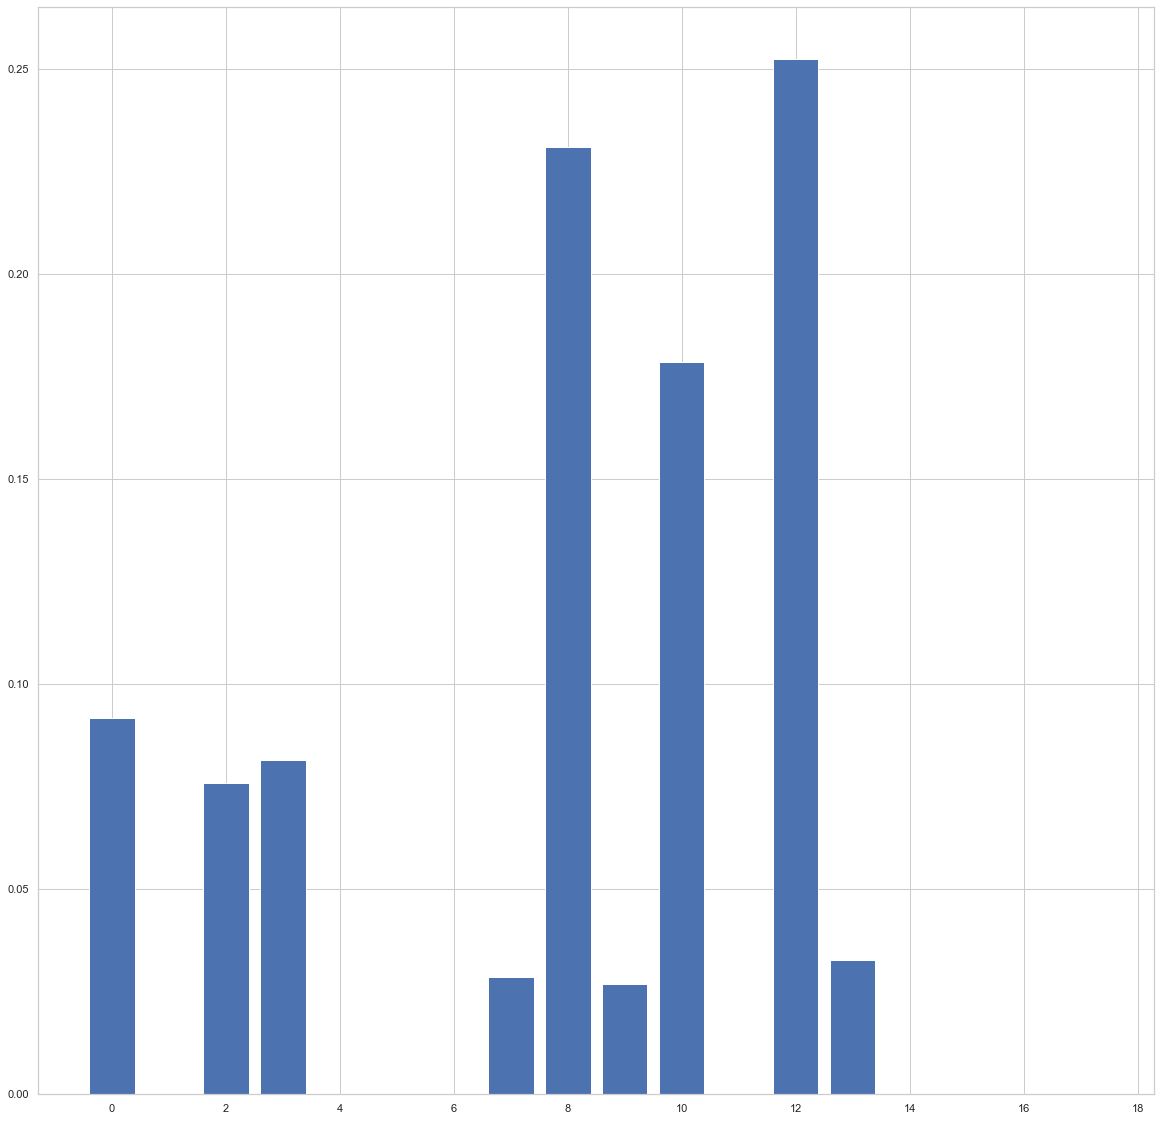

In [127]:
from matplotlib import pyplot
from matplotlib.ticker import MaxNLocator
importance = classifier.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

xs = range(18)
ax = pyplot.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.bar(xs, importance)

In [ ]:
# 0	'Age', 
# 1	'TypeofContact', 
# 2	'CityTier', 
# 3	'DurationOfPitch', 
# 4	'Occupation',
# 5	'Gender',
# 6	'NumberOfPersonVisited', 
# 7	'NumberOfFollowups',
# 8	'ProductPitched', 
# 9	'PreferredPropertyStar',
# 10	'MaritalStatus',
# 11	'NumberOfTrips', 
# 12	'Passport', 
# 13	'PitchSatisfactionScore', 
# 14	'OwnCar',
# 15	'NumberOfChildrenVisited', 
# 16	'Designation',
# 17	'MonthlyIncome'

In [ ]:
# Based on the above feature importance plot, 
# Passport, ProductPitched, MaritalStatus are positively impacting the Target variable

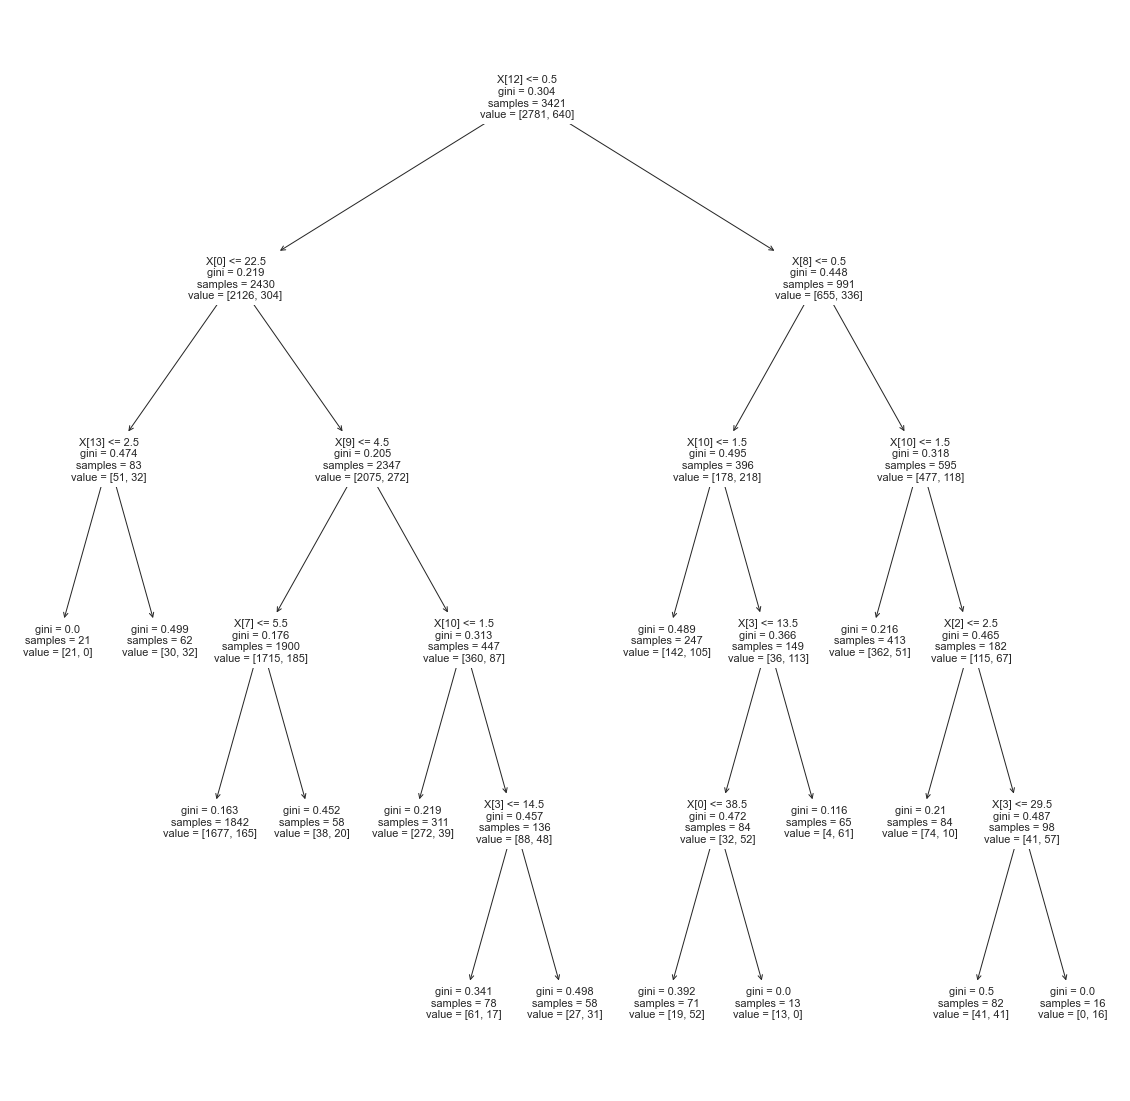

In [126]:
from sklearn import tree
tree.plot_tree(classifier)
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

In [101]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [102]:
print(confusion_matrix(y_test, y_pred))

[[1156   31]
 [ 204   76]]


In [103]:
#Based on the above Confusion Matrix
# Correct Classifications: 1156 + 93 = 1249 -> 86%
# MisClassifications: 187 + 31 = 218 -> 14%

In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91      1187
         1.0       0.71      0.27      0.39       280

    accuracy                           0.84      1467
   macro avg       0.78      0.62      0.65      1467
weighted avg       0.82      0.84      0.81      1467



In [105]:
# Accuracy of the Decision Tree classifier is : 84% 
# Which means, decision tree model is able to identify the customer 
# whether he can buy the package or not for about 85% of the cases

In [106]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1601908657123381
Mean Squared Error: 0.1601908657123381
Root Mean Squared Error: 0.4002385110310327


In [107]:
# Random Forest Implementation

In [108]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=0)
rf_classifier.fit(X_train, y_train)

y_pred2 = rf_classifier.predict(X_test)

In [109]:
print(confusion_matrix(y_test, y_pred2))

[[1174   13]
 [ 103  177]]


In [110]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      1187
         1.0       0.93      0.63      0.75       280

    accuracy                           0.92      1467
   macro avg       0.93      0.81      0.85      1467
weighted avg       0.92      0.92      0.91      1467



In [111]:
# Accuracy of the RandomForest Classifier is 90% with a depth of 15 nodes.
# Using Random Forest model, the accuracy of identifying the right customers is increased from 85% of decision tree to 92%. 

Feature ranking:
1. feature 17 (0.128312)
2. feature 0 (0.126276)
3. feature 3 (0.117647)
4. feature 12 (0.077564)
5. feature 11 (0.061943)
6. feature 13 (0.061282)
7. feature 10 (0.058757)
8. feature 7 (0.052560)
9. feature 9 (0.044991)
10. feature 8 (0.044389)
11. feature 4 (0.038905)
12. feature 2 (0.035638)
13. feature 16 (0.030021)
14. feature 15 (0.027975)
15. feature 6 (0.027122)
16. feature 1 (0.024583)
17. feature 5 (0.022597)
18. feature 14 (0.019440)


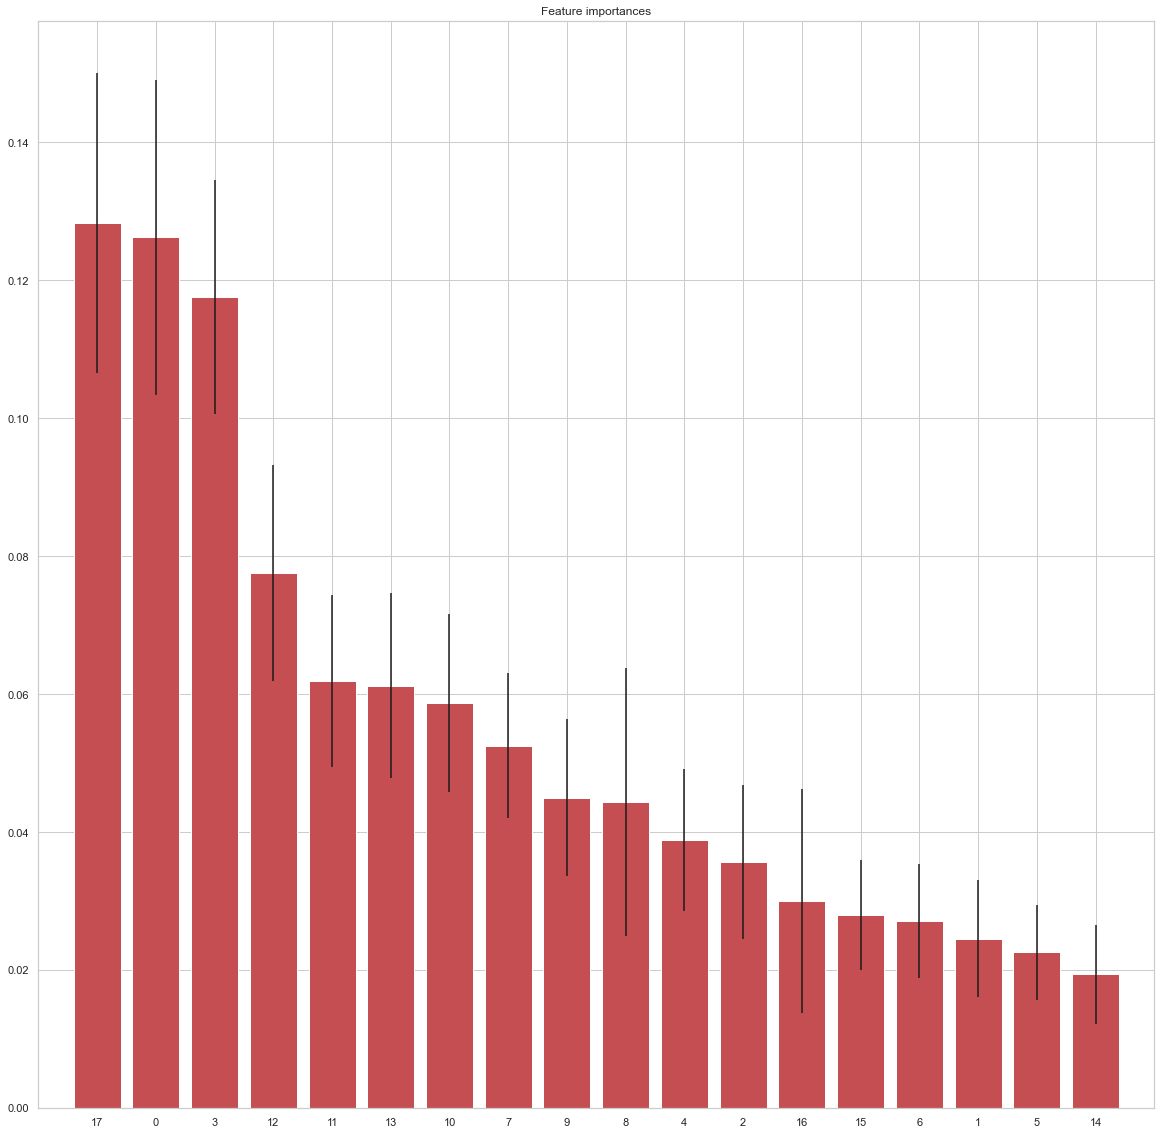

In [112]:
# Feature importance
importances = rf_classifier.feature_importances_
std = np.std([rf_classifier.feature_importances_ for rf_classifier in rf_classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [128]:
# 0	'Age', 
# 1	'TypeofContact', 
# 2	'CityTier', 
# 3	'DurationOfPitch', 
# 4	'Occupation',
# 5	'Gender',
# 6	'NumberOfPersonVisited', 
# 7	'NumberOfFollowups',
# 8	'ProductPitched', 
# 9	'PreferredPropertyStar',
# 10	'MaritalStatus',
# 11	'NumberOfTrips', 
# 12	'Passport', 
# 13	'PitchSatisfactionScore', 
# 14	'OwnCar',
# 15	'NumberOfChildrenVisited', 
# 16	'Designation',
# 17	'MonthlyIncome'

In [ ]:
# Whereas in RandomForest model, 
# MonthlyIncome, Age, DurationOfPitch, Passport are more positively impacting the target variable

In [114]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred2})
df.head(20)

,Actual,Predicted
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,1.0,0.0
4,0.0,0.0
5,0.0,0.0
6,1.0,1.0
7,0.0,0.0
8,0.0,0.0
9,1.0,1.0


In [115]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

Mean Absolute Error: 0.0790729379686435
Mean Squared Error: 0.0790729379686435
Root Mean Squared Error: 0.2811991073396989


In [116]:
# Error rate is also reduced 

In [117]:
# RandomForest Tuning
rf_opt_classifier = RandomForestClassifier(n_estimators=150, max_depth=25, random_state=0)
rf_opt_classifier.fit(X_train, y_train)

y_pred3 = rf_opt_classifier.predict(X_test)

In [118]:
print(confusion_matrix(y_test, y_pred3))

[[1175   12]
 [  94  186]]


In [119]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      1187
         1.0       0.94      0.66      0.78       280

    accuracy                           0.93      1467
   macro avg       0.93      0.83      0.87      1467
weighted avg       0.93      0.93      0.92      1467



In [120]:
# After trying RandomForest with 150 estimaters and depth as 25, the accuracy is increased from 90% to 91% only. 
# So, Keeping in consideration the resources requied to run RandomForest, estimators = 100 and depth = 15 is optimal configuration. 

In [121]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred3})
df.head(20)

,Actual,Predicted
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,0.0,0.0
5,0.0,0.0
6,1.0,1.0
7,0.0,0.0
8,0.0,0.0
9,1.0,1.0


In [122]:
# Modeling Building - 2 
# Stacking Classifier

>knn 0.788 (0.012)
>cart 0.891 (0.017)
>gradient_boost 0.864 (0.012)
>ada_boost 0.838 (0.014)
>stacking 0.900 (0.014)


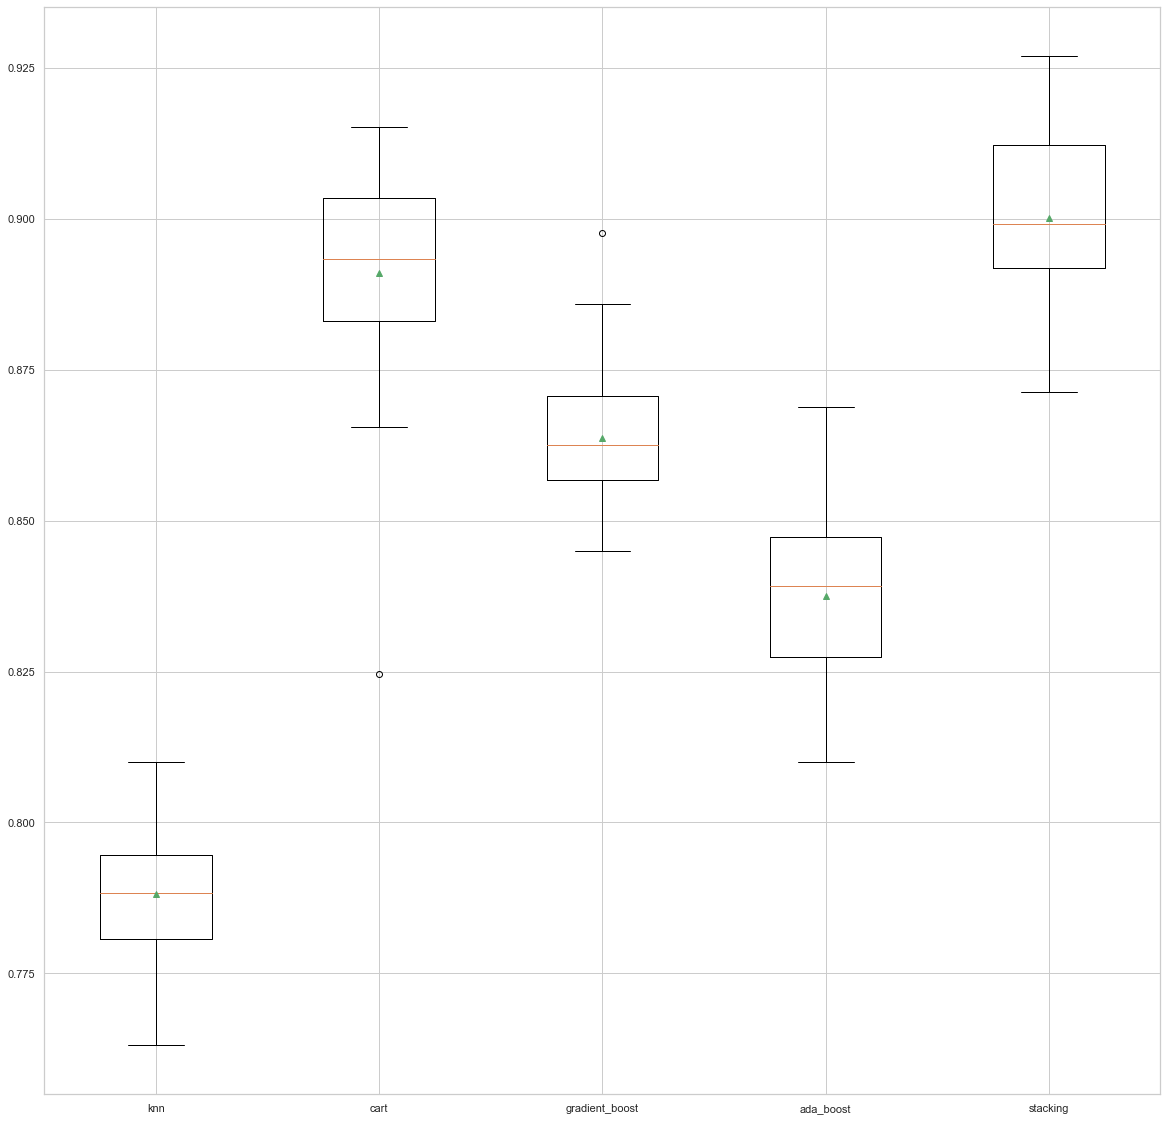

In [132]:
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot


# get a list of models to evaluate
def get_models():
    models = dict()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['gradient_boost'] = GradientBoostingClassifier()
    models['ada_boost'] = AdaBoostClassifier()
    models['stacking'] = get_stacking()
    return models

# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('gradient_boost', GradientBoostingClassifier()))
    level0.append(('ada_boost', AdaBoostClassifier()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores


# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [124]:
# The above report shows the mean performance of each algorithm and 
# also the box and whisker plot to compare the distribution of accuracy scores for each algorithm

# Though the CART - DecisionTree model is performing better, stacked model is performing at best. 

In [130]:
# Recommendations and Insights
#-----------------------------
# Based on the previous analysis MonthlyIncome, Age, Passport, MaritalStatus and ProductPitched 
# plays very important role in customer choosing the package.

# For the new package to be picked, all of the above specified feature values should be High.

# We can also try splitting Customers based on their salary, passport, owning a car 
# into General, Premium category customers and repeat this exercise separately for each group to get better outcome. 